# Movies Dataset from Pirated Sites
- id: movie's unique id  电影的id
- title: movie's name  电影的标题
- storyline: a short description of the movie  # 电影的故事
- views: no. of clicks per movie  # 点击量
- downloads: no. of downloads per movie  # 下载量
- IMDb-rating: rating  # imdb 评分
- appropriate_for: R-rated, PG-13, etc  # 分级
- language: this can be multiple languages also  # 语言
- industry: Hollywood, Bollywood, etc.  # 公司
- posted_date: when the movie is posted on the platform  # 平台发布时间
- release_date: when the movie is released worldwide  # 电影发行时间
- runtime: in minutes  # 电影时长
- director: director's name  # 导演
- writer: list of all the writers  # 作者

In [70]:
import pandas as pd

data = pd.read_csv('movies_dataset.csv')
columns = data.columns.tolist()
print(columns)  # 打印出数据的列
print(data.values[:2]) # 打印出前5列

['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'views', 'writer']
[[0 4.8 'R' 'John Swab' '304' 372092 'Hollywood / English' 'English'
  '20 Feb, 2023' 'Jan 28 2023' '105'
  'Doc\r\n facilitates a fragile truce between the Governor and Cartel, trading \r\nprosecutorial leniency for finance. With no more truce, Doc is left to \r\nfend for himself and protect the one untainted thing in his life: his \r\ndaughter, Little Dixie.'
  'Little Dixie' '2,794' 'John Swab']
 [1 6.4 'TV-PG' 'Paul Ziller' '73' 372091 'Hollywood / English' 'English'
  '20 Feb, 2023' 'Feb 05 2023' '84'
  'Caterer\r\n Goldy Berry reunites with detective Tom Schultz when a realtor is \r\nmurdered. As they uncover personal and professional rivalries, they \r\nrealize the culprit is closer than expected.'
  'Grilling Season: A Curious Caterer Mystery' '1,002'
  'John Christian Plummer']]


可以看出 'IMDb-rating','downloads','run_time','views'为数值型数据，其余为标称数据

In [71]:
# 进行数据预处理
# 1.对于run_time存在 1h22min这样的表述
import re
for index, row in enumerate(data['run_time']):
    if isinstance(row, int):
        data.loc[index, 'run_time'] = float(row)
    elif isinstance(row, str):
        h, m = 0, 0
        row = row.replace(' ', '').replace('min', 'm')
        if re.match(r'^\d{1,}$', row):  # 105:
            m = row
        elif re.match(r'^\d{1,}h\d{1,}m$', row):  # 1h22min
            h = row.split('h')[0]
            m = row.split('h')[1].split('m')[0]
        elif re.match(r'^\d{1,}m$', row): # 188m
            m = row.split('m')[0]
        elif re.match(r'^\d{1,}h$', row):  # 2h
            h = row.split('h')[0]
        else:
            print(row)
            break
        data.loc[index, 'run_time'] = float(int(h)*60+int(m))

In [72]:
# 对IMDB_rating进行预处理，转化成为float类型的数据
for index, row in enumerate(data['IMDb-rating']):
    if not isinstance(row, float):
        data.loc[index, 'IMDB-rating'] = float(row)

In [73]:
# 对 dowloads 进行处理，转化成 float 类型数据
# 1,425
for index, row in enumerate(data['downloads']):  
    if not isinstance(row, float):
        row = row.replace(',', '')
        data.loc[index, 'downloads'] = float(row)

In [74]:
# 对 views 进行预处理，转化成float 类型的数据
# 2,794
for index, row in enumerate(data['views']):
    if not isinstance(row, float):
        row = row.replace(',', '')
        data.loc[index, 'views'] = float(row)

In [75]:
import math
def Q5_analysis(data, column_name): # 进行5数分析
    data = data.tolist()
    blank_cnt = 0
    data_proc = []
    for each_data in data:
        if math.isnan(each_data):  # 空数据为 non
            blank_cnt += 1
        else:
            data_proc.append(each_data)
    data = data_proc
    data.sort()
    length = len(data)
    Q = length>>2
    Q1 = data[Q]
    Q3 = data[-Q]
    mn = data[0]
    mx = data[-1]
    mean = data[length>>1] if length&1 else (data[length>>1]+data[length//2-1])/2
    print(f'DataType: {column_name}, MIN: {mn:.3f}, Q1: {Q1:.3f}, Mean: {mean:.3f}, Q3: {Q3:.3f}, MAX: {mx:.3f}, 缺失数量: {blank_cnt}')

digital_type = ['IMDb-rating','downloads','run_time','views']

for column_name in digital_type:
    column_data = data[column_name]
    Q5_analysis(column_data, column_name)

DataType: IMDb-rating, MIN: 1.100, Q1: 4.800, Mean: 5.700, Q3: 6.600, MAX: 9.900, 缺失数量: 841
DataType: downloads, MIN: 0.000, Q1: 855.000, Mean: 2716.000, Q3: 10080.000, MAX: 391272.000, 缺失数量: 1
DataType: run_time, MIN: 2.000, Q1: 90.000, Mean: 100.000, Q3: 117.000, MAX: 321.000, 缺失数量: 1768
DataType: views, MIN: 667.000, Q1: 7571.000, Mean: 15222.000, Q3: 36580.000, MAX: 1638533.000, 缺失数量: 1


上面过程中分析了四种数值型类型的最小值、Q1、平均值、Q3、最大值。其中run_time的缺失了1768条数据，IMDb-rating缺失了841条数据。
下面将统计标称数据的频率和可能的取值。

In [76]:
text_types = ['id','title', 'appropriate_for', 'language', 'industry', 'director', 'writer']  # 所有的标称

from collections import Counter
def counter(column_data, column_name):
    counter = Counter(column_data.tolist())
    length = len(counter)
    # 打印出前5最高的频数
    print(f"标称属性: {column_name}, 类别数量：{length}")
    print(counter.most_common()[:5])

for column_name in text_types:
    column_data = data[column_name]
    counter(column_data, column_name)

标称属性: id, 类别数量：17086
[(372090, 402), (371877, 402), (371744, 402), (372092, 202), (371991, 202)]
标称属性: title, 类别数量：16573
[('Vaathi', 402), ('The Girl Who Escaped: The Kara Robinson Story', 402), ('Who Invited Charlie?', 402), ('Little Dixie', 202), ('The Inspection', 202)]
标称属性: appropriate_for, 类别数量：22
[(nan, 9476), ('R', 4384), ('Not Rated', 2142), ('PG-13', 1968), ('PG', 886)]
标称属性: language, 类别数量：1169
[('English', 12657), ('Hindi', 2558), (nan, 542), ('English,Spanish', 391), ('Punjabi', 310)]
标称属性: industry, 类别数量：11
[('Hollywood / English', 14649), ('Bollywood / Indian', 2645), ('Tollywood', 1172), ('Anime / Kids', 1049), ('Wrestling', 433)]
标称属性: director, 类别数量：9673
[(nan, 1938), ('Venky Atluri', 405), ('Simone Stock', 403), ('Xavier Manrique', 403), ('John Swab', 205)]
标称属性: writer, 类别数量：13604
[(nan, 2192), ('Nicholas Schutt', 403), ('Venky Atluri', 402), ('Haley Harris', 402), ('John Swab', 205)]


# 3.1 数据可视化
采用直方图、盒图来可视化数据，检查数据分布和离群点

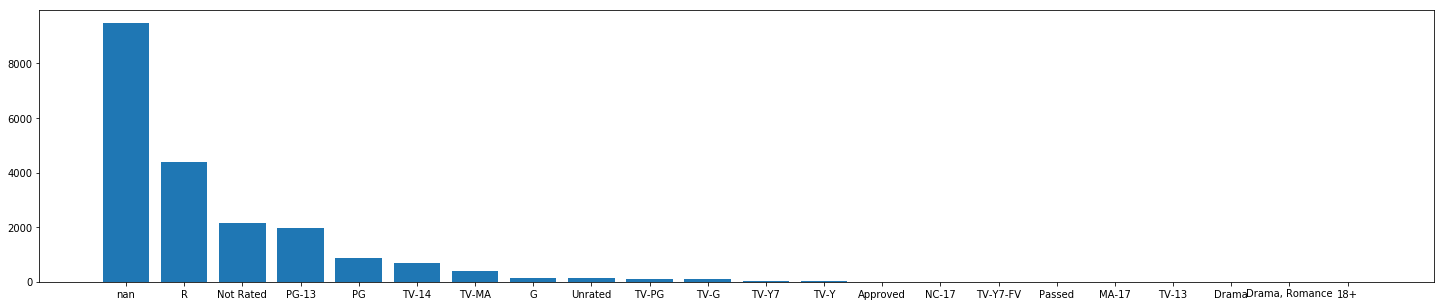

In [77]:
# 使用直方图来统计各种类型的电影的数量
counter = Counter(data['appropriate_for'])
xs, ys = [], []
for key,value in counter.most_common():
    xs.append(key)
    ys.append(value)

from matplotlib import pyplot as plt 

fig, ax = plt.subplots(figsize=(25,5))
ax.bar(x=range(len(xs)), height=ys)
ax.set_xticks(range(len(xs)))
ax.set_xticklabels(xs)
plt.show()

可以看出电影限制级别为nan的电影最多，其次是R级，18+级别的最少。

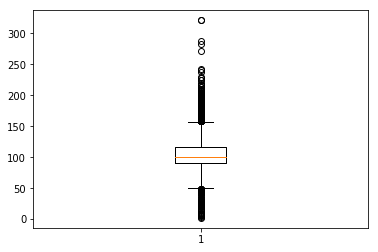

电影名：Gangs of Wasseypur 2, 时长：321.0
电影名：Gangs of Wasseypur, 时长：321.0


In [78]:
# 使用盒图来统计电影的时长
run_time = data['run_time']
run_time = [t for t in run_time if not math.isnan(t)]
fig, ax = plt.subplots()
ax.boxplot(run_time)
plt.show()
for tt, rt in zip(data['title'], data['run_time']):
    if rt > 300: # 找出时长在300分钟以上的电影
        print(f'电影名：{tt}, 时长：{rt}')

可以看出电影中存在一个时长超过300分钟的离群点，为Ganga of Wasseypur2

## 3.2 数据缺失的处理
要求：
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

通过前面的分析，数值型数据IMDb-rating和run_time中存在大量空值，猜测IMDb-rating出现空值的原因可能是IMDb平台未收录相关电影。而run_time出现空值的原因可能是工作人员未录入相关的电影时长。下面采用要求的四种方法来试图填补IMDb-rating的空值。并分析处理前后电影IMDb-rating的5数特征。


MIN: 1.100, Q1: 4.700, Mean: 5.700, Q3: 6.500, MAX: 9.900


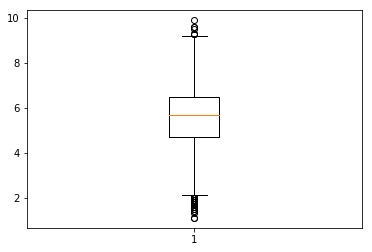

In [79]:
# 通过将缺失部分剔除来计算电影评分的Q5数据
# 对相同id的电影进行去重
def Q5_test(data): # 进行5数分析
    data.sort()
    length = len(data)
    Q = length>>2
    Q1 = data[Q]
    Q3 = data[-Q]
    mn = data[0]
    mx = data[-1]
    mean = data[length>>1] if length&1 else (data[length>>1]+data[length//2-1])/2
    print(f'MIN: {mn:.3f}, Q1: {Q1:.3f}, Mean: {mean:.3f}, Q3: {Q3:.3f}, MAX: {mx:.3f}')

id_score = {}  # id->score
for id, score in zip(data['id'], data['IMDb-rating']):
    if not math.isnan(score):
        id_score[id] = score
movie_scores = list(id_score.values())
Q5_test(data=movie_scores)
fig, ax = plt.subplots()
ax.boxplot(movie_scores)
plt.show()

MIN: 1.100, Q1: 4.800, Mean: 5.700, Q3: 6.500, MAX: 9.900


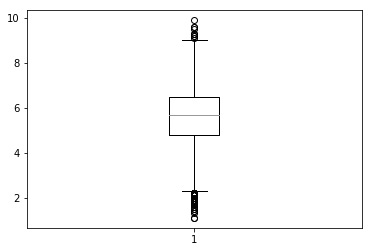

In [88]:
# 采用众数来替代缺失的值
mode = Counter(movie_scores).most_common()[0][0]  # 众数
movies_cnt = len( Counter(data['id']) )  # 所有的电影的数量
movie_scores_mode = movie_scores + [mode] * ( movies_cnt - len(movie_scores) )
Q5_test(movie_scores_mode)
fig, ax = plt.subplots()
ax.boxplot(movie_scores_mode)
plt.show()

和剔除调缺失值相比，使用众数来替代缺失值Q1值发生了改变。由4.7变成了4.8

MIN: 1.100, Q1: 4.800, Mean: 5.700, Q3: 6.600, MAX: 9.900


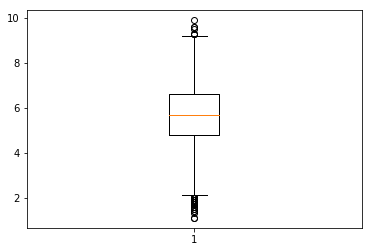

In [106]:
# 通过属性的相关关系来填补空缺值
# 我认为电影评分和电影的导演存在明显的相关关系，因此通过这个关系来填补空值

id2dir = {id: director for id, director in zip(data['id'], data['director'])} 
dir2id = {}
for id, dirctor in id2dir.items():
    if dirctor not in dir2id.keys():
        dir2id[dirctor] = []
        dir2id[dirctor].append(id)
    elif id not in dir2id[dirctor]:
        dir2id[dirctor].append(id)

id2score = {id: score for id, score in zip(data['id'], data['IMDb-rating']) if not math.isnan(score)}

dir2score = {}
# 统计导演的平均评分,如果没有成绩记作-1
for dir, ids in dir2id.items():
    score, cnt = 0, 0
    for id in ids:
        if id in id2score.keys():
            score += id2score[id]
            cnt += 1
    if cnt == 0:
        dir2score[dir] = -1
    else:
        dir2score[dir] = score/cnt

movie_score_dir = []
id_dict = {}
for id, director, score in zip(data['id'], data['director'], data['IMDb-rating']):
    if id in id_dict.keys():
        continue
    id_dict[id] = 0
    if not math.isnan(score):
        movie_score_dir.append(score)
    elif dir2score[director] != -1:
        movie_score_dir.append(dir2score[dir])
Q5_test(movie_score_dir)  
fig, ax = plt.subplots()
ax.boxplot(movie_score_dir)
plt.show()

上述方法中，如果某一部电影没有评分数据，如果电影的导演存在别的评分数据，则利用该导演所有电影的评分数据的平均分作为填充。和剔除相比，数据的Q3发生了变化，提高了0.1的评分。

MIN: 1.100, Q1: 4.800, Mean: 5.700, Q3: 6.500, MAX: 9.900


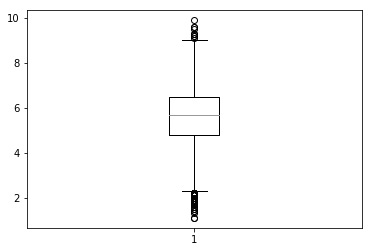

In [109]:
# 利用相似性来填补空缺值
# 电影的相似性体现在多个方面，电影的导演、出产电影的公司等。因此利用电影的导演和电影的公司两个项目共同预测电影的评估。

industry2score = {}
id_dict = {}
for industry, id, score in zip(data['industry'], data['id'], data['IMDb-rating']):
    if id in id_dict.keys():
        continue
    id_dict[id] = 0
    if not math.isnan(score):
        if industry not in industry2score.keys():
            industry2score[industry] = []
        industry2score[industry].append(score)

for industry, scores in industry2score.items():
    if len(scores) > 0:
        industry2score[industry] = sum(scores) / len(scores)
    else:
        industry2score[industry] = -1

movie_score_dir_ind = []
id_dict = {}
for id, dir, ind, score in zip(data['id'], data['director'], data['industry'], data['IMDb-rating']):
    if id in id_dict.keys():
        continue
    id_dict[id] = 0
    if not math.isnan(score):
        movie_score_dir_ind.append(score)
    else:
        if industry2score[ind] == -1 and dir2score[dir] == -1:
            continue
        score, cnt = 0, 0
        if industry2score[ind] != -1:
            score += industry2score[ind]
            cnt += 1
        if dir2score[dir] != -1:
            score += dir2score[dir]
            cnt += 1
        score /= cnt
        movie_score_dir_ind.append(score)
Q5_test(movie_score_dir_ind)
fig, ax = plt.subplots()
ax.boxplot(movie_score_dir_ind)
plt.show()

和只利用导演的平均分作为填充值比较，利用导演和工厂的平均分Q3提升了0.1。